## General Observations of the Properties of SNe-heated Gas Particles
`-- Leo Lonzarich, September 23 2021 --`

### Table of Contents
- [Comparing SNe Gas to Other Gas](#compare)
- [Radial Velocity](#radvelocity)
- [Mass Across Halos](#mass)
- [Physical Distribution](#distribution)

In [1]:
import numpy as np
import pylab
import pynbody
import pynbody.plot.sph as sph
import matplotlib.pyplot as plt

In [2]:
# importing simulation 

h148 = pynbody.load('../h148.cosmo50PLK.3072g3HbwK1BH/snapshots_200bkgdens/h148.cosmo50PLK.3072g3HbwK1BH.004096')
h229 = pynbody.load('../h229.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h229.cosmo50PLK.3072gst5HbwK1BH.004096')
h242 = pynbody.load('../h242.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h242.cosmo50PLK.3072gst5HbwK1BH.004096')
h329 = pynbody.load('../h329.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h329.cosmo50PLK.3072gst5HbwK1BH.004096')

In [3]:
# halo numbers for halos with stars in them and fMhires > 0.9 [updated 09-08-21]

nums_h148 = [1, 2, 3, 5, 6, 9, 10, 11, 13, 14, 21, 24, 27, 28, 30, 32, 36, 37, 41, 45, 47, 48, 58, 61, 65, 68, 80, 81, 96, 105, 119, 127, 128, 136, 163, 212, 265, 278, 283, 329, 372, 377, 384, 386, 442, 491, 620, 678, 699, 711, 759, 914, 1004, 1024, 1201, 1217, 1451, 2905, 5039]
nums_h229 = [1, 2, 5, 7, 17, 20, 22, 23, 27, 29, 33, 52, 53, 55, 59, 61, 62, 73, 104, 113, 139, 212, 290, 549, 1047, 1374, 1483, 1558, 6045]
nums_h242 = [1, 10, 12, 24, 30, 34, 40, 41, 44, 48, 49, 71, 78, 80, 86, 165, 223, 439, 480, 1872, 2885, 6054, 9380, 10426, 12297]
nums_h329 = [1, 11, 31, 33, 40, 64, 103, 133, 137, 146, 185, 447, 729, 996, 1509]

## Treating h148: 
_______________
_______________

### Comparing SNe Gas to Other Gas  <a class="anchor" id="compare"></a>

### Radial Velocity <a class="anchor" id="radvelocity"></a>

Centering on a halo, particle velocities are normalized such that the magnitudes of the vx, vy, and vz components together give the radial velocity for the particles.

In [4]:
h148.gas.loadable_keys();

In [179]:
# setting the halo we want to study

n = 1

# pulling out a halo from simulation
h_h148 = h148.halos() 
halon = h_h148[nums_h148[n]]

# unpacking, centering on desired halo.
pynbody.analysis.halo.center(halon, mode='com', vel=True)

In [250]:
# selecting those gas particles in the simulation still affected by SN heating.
simtime = h148.properties['time']
heated = halon[pynbody.filt.HighPass('coolontime', simtime)];

# picking out the velocities of normal and hot gas in the halo.
hvel = halon['vel'] 
hvel_hot = heated['vel']

def norm(x):
    '''
    Overview:
        Takes the rudementary norm of the rows of arrays. Quicker than computation via linalg.norm.
    
    Inputs:
    -> 'x', array-like.
    
    Output:
    -> 1xn array with each column entry representing the norm of the row of equivalent index.
    '''
    #-----------------------------#
    
    return np.sum(np.abs(x)**2,axis=-1)**(1./2)
    




rvel = norm(hvel)
rvel_hot = norm(hvel_hot)

# scaling number of gas particles to compare with heated gas.
rvel_ref = np.random.choice(rvel, size=20000, replace=False)

In [98]:
rvel_ref = np.random.choice(rvel, size=20000, replace=False)

array([0.08758783, 0.10065357, 0.0404318 , ..., 0.05842027, 0.06758609,
       0.08303986])

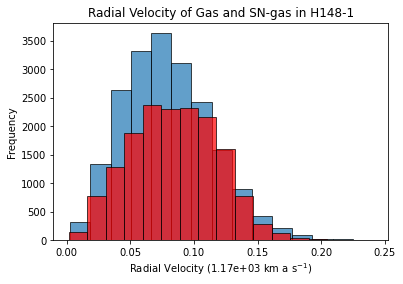

In [106]:
bins = 15 # setting # of bins.

plt.figure(figsize=(6,4))
plt.title('Radial Velocity of Gas and SN-gas in H148-1',fontsize=12)
plt.xlabel('Radial Velocity (1.17e+03 km a s$^{-1}$)', fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.hist(rvel_ref, bins, alpha=0.7, histtype='bar', ec='black')
plt.hist(rvel_hot, bins, alpha=0.7, histtype='bar', ec='black', color='red')


plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10) 
plt.show() 

### Mass Across Halos <a class="anchor" id="mass"></a>

We start out here by finding the mass of those gas particles heated by supernovae, then compare these masses to those of particles to all particles in the halo, and those that are cooled (i.e., those that have temperatures less than $10^4$ Kelvin).

In [104]:
simtime = h148.properties['time']

totMass = halon.gas['mass'] # callable for masses of all halo gas particles.
coolMass = halon.gas[pynbody.filt.LowPass('temp', 10**4)]['mass'] # cold gas masses.
hotMass = halon.gas[pynbody.filt.HighPass('coolontime', simtime)]['mass'] # callable for mass of heated gas.


len(totGas), len(coolGas), len(hotGas)

# the counts of all gas particles and cool gas particles far exceed that of hot gas, and so we randomly 
# select from the sets of all gas and cool gas to compare against the hot gas.

totMass = np.random.choice(totMass, size=20000, replace=False)
coolMass = np.random.choice(coolMass, size=20000, replace=False)


'''
# Now Finding the temperatures, radial position corresponding to the particles here selected.
totTemp = np.random.choice(halon.gas['temp'], size=20000, replace=False)
coolTemp = np.random.choice(halon.gas[pynbody.filt.LowPass('temp', 10**4)]['temp'],\
    size=20000, replace=False)
hotTemp = halon.gas[pynbody.filt.HighPass('coolontime', simtime)]['temp']

totPos = np.random.choice(halon.gas['temp'], size=20000, replace=False)
coolPos = np.random.choice(halon.gas[pynbody.filt.LowPass('temp', 10**4)]['temp'],\
    size=20000, replace=False)
hotPos = halon.gas[pynbody.filt.HighPass('coolontime', simtime)]['temp']


halon.gas.derivable_keys()
'''

"\n# Now Finding the temperatures, radial position corresponding to the particles here selected.\ntotTemp = np.random.choice(halon.gas['temp'], size=20000, replace=False)\ncoolTemp = np.random.choice(halon.gas[pynbody.filt.LowPass('temp', 10**4)]['temp'],    size=20000, replace=False)\nhotTemp = halon.gas[pynbody.filt.HighPass('coolontime', simtime)]['temp']\n\ntotPos = np.random.choice(halon.gas['temp'], size=20000, replace=False)\ncoolPos = np.random.choice(halon.gas[pynbody.filt.LowPass('temp', 10**4)]['temp'],    size=20000, replace=False)\nhotPos = halon.gas[pynbody.filt.HighPass('coolontime', simtime)]['temp']\n\n\nhalon.gas.derivable_keys()\n"

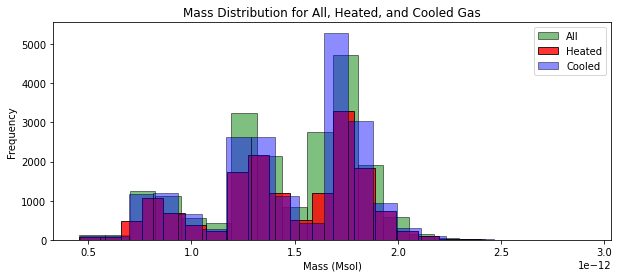

In [105]:
bins = 20

# Comparing distribution of masses for different particle types.
plt.figure(figsize=(10,4))
plt.title('Mass Distribution for All, Heated, and Cooled Gas',fontsize=12)
plt.xlabel('Mass (Msol)', fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.hist(totMass, bins, alpha=0.5, histtype='bar', ec='black', color='green', label='All')
plt.hist(hotMass, bins, alpha=0.8, histtype='bar', ec='black', color='red', label='Heated')
plt.hist(coolMass, bins, alpha=0.45, histtype='bar', ec='black', color='blue', label='Cooled')


plt.legend()
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10) 
plt.show() 

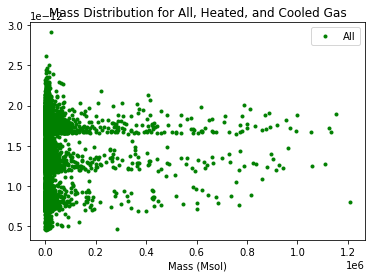

In [106]:
bins = 20

# Comparing distribution of masses for different particle types.
plt.figure(figsize=(6,4))
plt.title('Mass Distribution for All, Heated, and Cooled Gas',fontsize=12)
plt.xlabel('Mass (Msol)', fontsize=10)
plt.ylabel('',fontsize=10)
plt.plot(totTemp, totMass, '.', color='green', label='All')
#plt.hist(hotTemp, bins, alpha=0.8, histtype='bar', ec='black', color='red', label='Heated')
#plt.hist(coolTemp, bins, alpha=0.45, histtype='bar', ec='black', color='blue', label='Cooled')


plt.legend()
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10) 
plt.show() 

### Physical Distributions <a class="anchor" id="distribution"></a>

Radial locations of particles \[\# of gas particles < halo radius vs. radius\]

In [23]:
h148.gas.keys()

['rho',
 'mass',
 'vel',
 'temp',
 'coolontime',
 'phi',
 'z',
 'vz',
 'vy',
 'x',
 'vx',
 'y',
 'eps',
 'pos',
 'metals']

In [257]:
# radial positions of total, cool, and hot gas.

totPos = halon.gas['pos'] # cartesian position for all gas particles.
totRad = norm(totPos) # converting cartesian to radial (quicker than linalg).

totRad = np.random.choice(totRad, size=20000, replace=False)

coolPos = halon.gas[pynbody.filt.LowPass('temp', 10**4)]['pos']
coolRad = norm(coolPos)

coolRad = np.random.choice(coolRad, size=20000, replace=False)

hotPos = halon.gas[pynbody.filt.HighPass('coolontime', simtime)]['pos']
hotRad = norm(hotPos)



def radial_stack(pos, num=20):
    '''
    Overview:
        Accruing the number of particles within radial sudivisions of a halo.
    
    Inputs:
    -> 'pos', array-like containing radial positions of particles of a centered halo.
    -> 'num', number of slices.
    
    Output:
    -> 'stack', array specifying the number of particles within a given radius of a halo.
    '''
    #-----------------------------#
    
    # initializing array, setting equally spaced radial distances
    stack = np.array([np.linspace(0, np.max(pos), num), np.zeros(num)])
    
    for i in range(0, num):
        for j in range(0, len(pos)):
            if pos[j] < stack[0,i]:
                stack[1,i] += 1
                
    return stack


# distribution of respective gas particles radially from halo center.
slices= 50
tot_dist = radial_stack(totRad, slices) 
cool_dist = radial_stack(coolRad, slices)
hot_dist = radial_stack(hotRad, slices)

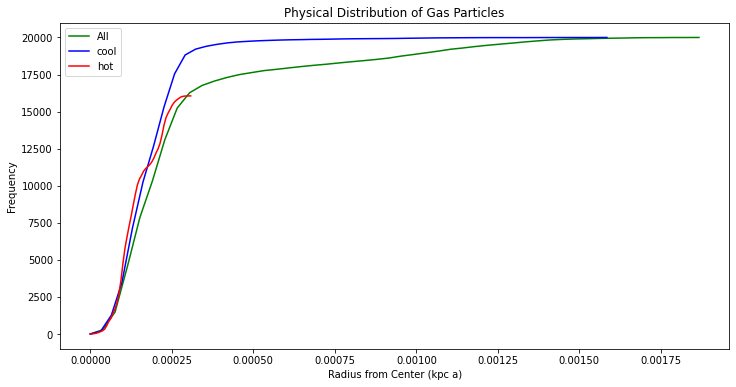

In [260]:
plt.figure(figsize=(12,6))
plt.title('Physical Distribution of Gas Particles',fontsize=12)
plt.xlabel('Radius from Center (kpc a)', fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.plot(tot_dist[0], tot_dist[1],color='green', label='All')
plt.plot(cool_dist[0], cool_dist[1], color='blue', label='cool')
plt.plot(hot_dist[0], hot_dist[1], color='red', label='hot')

plt.legend()
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10) 
plt.show() 



plt.figure(figsize=(12,6))
plt.title('Physical Distribution of Gas Particles',fontsize=12)
plt.xlabel('Radius from Center (kpc a)', fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.plot(totRad, tot_dist[1],color='green', label='All')
plt.plot(cool_dist[0], cool_dist[1], color='blue', label='cool')
plt.plot(hot_dist[0], hot_dist[1], color='red', label='hot')

plt.legend()
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10) 
plt.show() 
